 Import libraries

In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

1.Data Acquisition

In [37]:

data = pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


2.data cleaning

In [38]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [39]:
data.shape


(1025, 14)

In [40]:
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [41]:
data.rename(columns={'cp': 'chest_pain_type', 'trestbps': 'resting_blood_pressure', 'chol': 'cholestrol', 'fbs': 'fasting_blood_pressure', 'restecg': 'resting_electrocardiographic_results', 'thalach': 'maximum_heart_rate', 'exang': 'exercise_induced_agina', 'ca': 'coronary_artery_calcium', 'thal': 'thalassemia'}, inplace=True)


In [42]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_pressure,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_agina,oldpeak,slope,coronary_artery_calcium,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [43]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_pressure,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_agina,oldpeak,slope,coronary_artery_calcium,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


3 Exploratory Data Analysis (EDA):

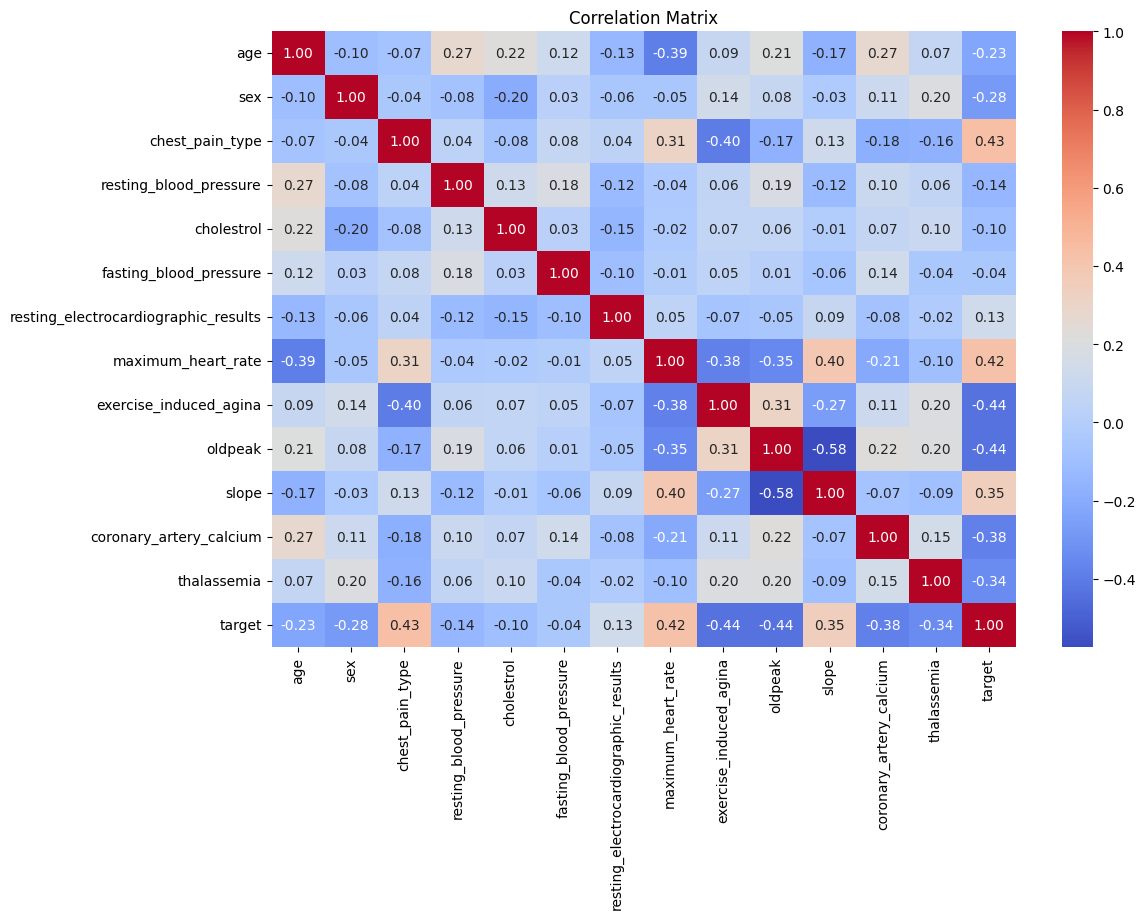

In [44]:

#Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

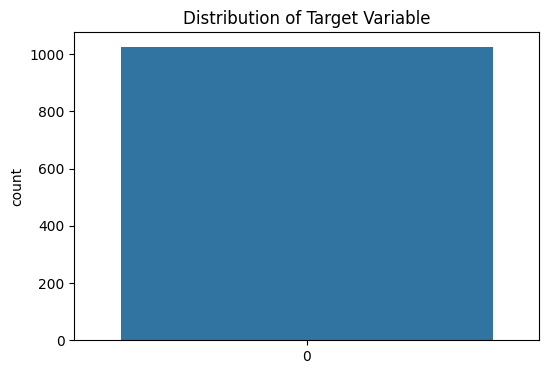

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(data['target'])
plt.title('Distribution of Target Variable')
plt.show()


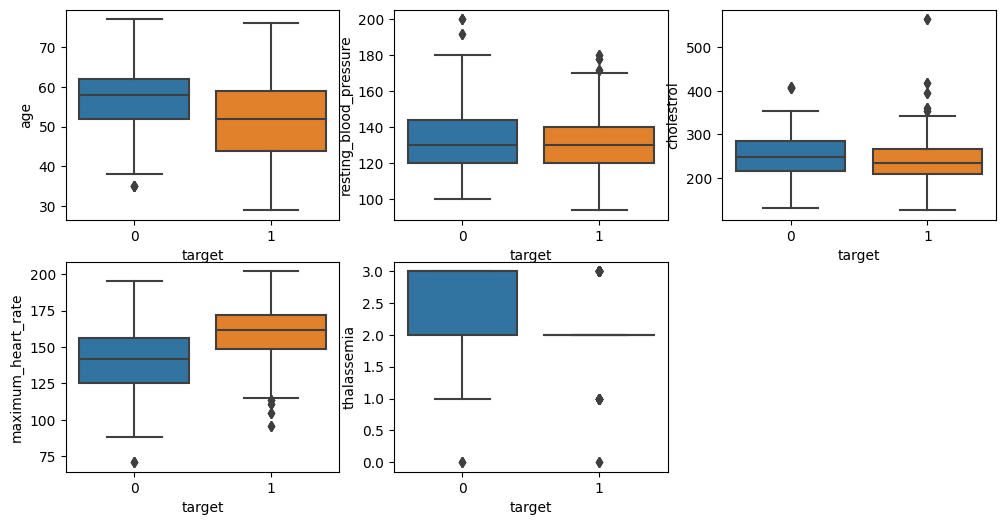

In [46]:
selected_features_boxplot = ['age', 'resting_blood_pressure', 'cholestrol', 'maximum_heart_rate', 'thalassemia']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(selected_features_boxplot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=feature, data=data)
plt.show()

4 Data Splitting:

In [47]:

X = data.drop('target', axis=1)
y = data['target']

In [48]:
X

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_pressure,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_agina,oldpeak,slope,coronary_artery_calcium,thalassemia
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [49]:
y


0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [50]:
categorical_cols = ['chest_pain_type', 'fasting_blood_pressure', 'resting_electrocardiographic_results', 'exercise_induced_agina', 'coronary_artery_calcium', 'thalassemia']


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (820, 13)
Shape of X_test: (205, 13)
Shape of y_train: (820,)
Shape of y_test: (205,)


In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

5 feature engineering

In [54]:
data['age_group'] = pd.cut(data['age'], bins=[29, 39, 49, 59, 69, 100], labels=['middle age ', 'young', ' citizon', 'senior citizon', 'most senior citizon'])
print("age_group:")
print(data.head())

age_group:
   age  sex  chest_pain_type  resting_blood_pressure  cholestrol  \
0   52    1                0                     125         212   
1   53    1                0                     140         203   
2   70    1                0                     145         174   
3   61    1                0                     148         203   
4   62    0                0                     138         294   

   fasting_blood_pressure  resting_electrocardiographic_results  \
0                       0                                     1   
1                       1                                     0   
2                       0                                     1   
3                       0                                     1   
4                       1                                     1   

   maximum_heart_rate  exercise_induced_agina  oldpeak  slope  \
0                 168                       0      1.0      2   
1                 155                       1  

In [55]:
print("Modified dataset after feature engineering:")
print(data.head())

Modified dataset after feature engineering:
   age  sex  chest_pain_type  resting_blood_pressure  cholestrol  \
0   52    1                0                     125         212   
1   53    1                0                     140         203   
2   70    1                0                     145         174   
3   61    1                0                     148         203   
4   62    0                0                     138         294   

   fasting_blood_pressure  resting_electrocardiographic_results  \
0                       0                                     1   
1                       1                                     0   
2                       0                                     1   
3                       0                                     1   
4                       1                                     1   

   maximum_heart_rate  exercise_induced_agina  oldpeak  slope  \
0                 168                       0      1.0      2   
1             

6 Model Selection

In [56]:

model=RandomForestClassifier()

7 Model training

In [57]:

model.fit(X_train,y_train)

RandomForestClassifier()

8 Model prediction

In [58]:

y_pred = model.predict(X_test)

In [33]:
classifiers ={'Random Forest': RandomForestClassifier()}

9 Model evaluation

In [59]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

Model: Random Forest
Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767
F1 Score: 0.9852216748768473


10 Model optimization

In [60]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9853658536585366
Precision: 1.0
Recall: 0.970873786407767
F1 Score: 0.9852216748768473
